# Saving and Loading Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
np.random.seed(101)
tf.random.set_seed(101)

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [3]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [4]:
x_data

array([0.04919588, 1.32311387, 0.8076449 , 2.3478983 , 5.00027539,
       6.55724614, 6.08756533, 8.95861702, 9.55352047, 9.06981686])

In [5]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

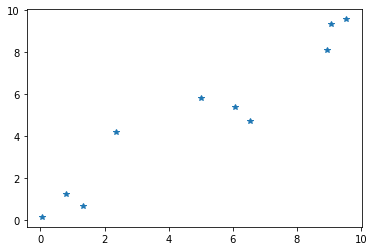

In [6]:
plt.plot(x_data,y_label,'*')

In [7]:
np.random.rand(2)

array([0.68530633, 0.51786747])

In [8]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

### Cost Function

In [9]:
@tf.function
def loss():
    loss = 0

    for x,y in zip(x_data,y_label):
        y_hat = m*x + b  #Our predicted value
        loss += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)

    return loss

### Optimizer

In [10]:
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# Saving The Model

In [11]:
class Trainer(tf.Module):
    
    @tf.function
    def do_train(self):
        epochs = 100

        for i in range(epochs):
            optimizer.minimize(loss, var_list=[m, b])

        # Fetch Back Results
        return m, b

In [12]:
model = Trainer()

In [13]:
type(model)

__main__.Trainer

In [14]:
tf.saved_model.save(model, 'new_models/my_second_model.ckpt')

INFO:tensorflow:Assets written to: new_models/my_second_model.ckpt\assets


### Evaluate Results

In [15]:
final_slope , final_intercept = model.do_train()

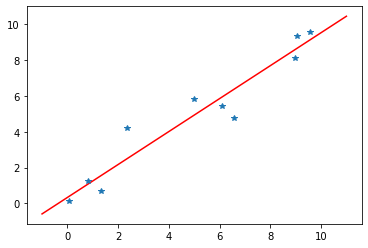

In [16]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Loading a Model

In [17]:
imported = tf.saved_model.load('new_models/my_second_model.ckpt')

In [18]:
final_slope , final_intercept= imported.do_train()

ValueError: Could not find matching function to call loaded from the SavedModel. Got:
  Positional arguments (0 total):
    * 
  Keyword arguments: {}

Expected these arguments to match one of the following 0 option(s):

